In [250]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [251]:
from sklearn.datasets import make_blobs
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.

    For an example of usage, see
    :ref:`sphx_glr_auto_examples_datasets_plot_random_dataset.py`.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.

        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter

    n_features : int, default=2
        The number of features for each sample.

    centers : int or array-like of shape (n_centers, n_features), default=None
        The

In [252]:
#EXAMPLE 1

X, y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.40)
print(X.shape)
print(y.shape)

(120, 2)
(120,)


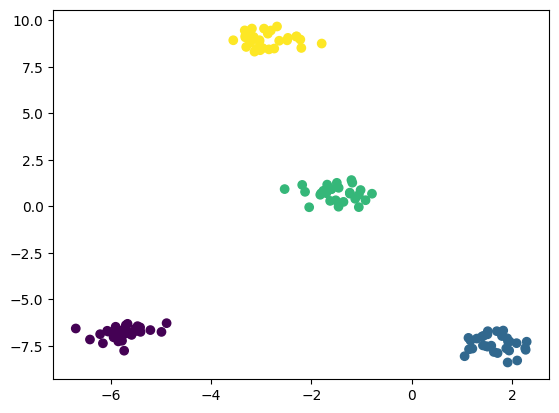

In [253]:
#Plot the data samples in X to see the clusters.

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

[[-5.73635979 -6.79944093]
 [-1.52040664  0.71534874]
 [-2.88225521  8.96340795]
 [ 1.67082163 -7.4065031 ]]


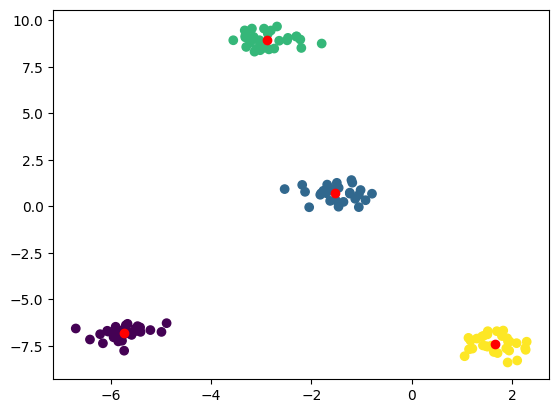

In [254]:
#Run the implemented KMeans function K-Means, fit the model and predict the outcome.
#Plot the results in order to see whether the clustering worked.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)

centers = kmeans.cluster_centers_
print(centers)

y_pred = kmeans.predict(X)

plt.plot(centers[:, 0], centers[:, 1], 'ro')
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

In [255]:
#Calculate inertia - Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 35.187882577471704


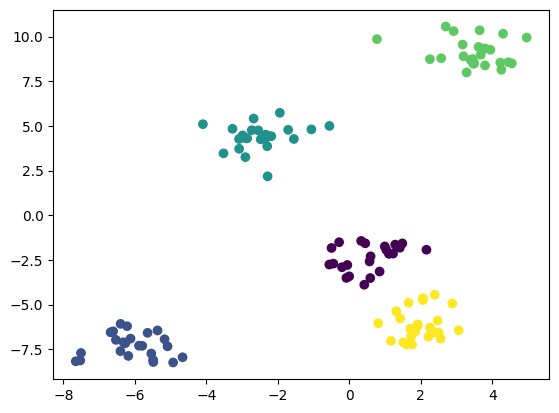

In [256]:
#EXAMPLE 2

X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

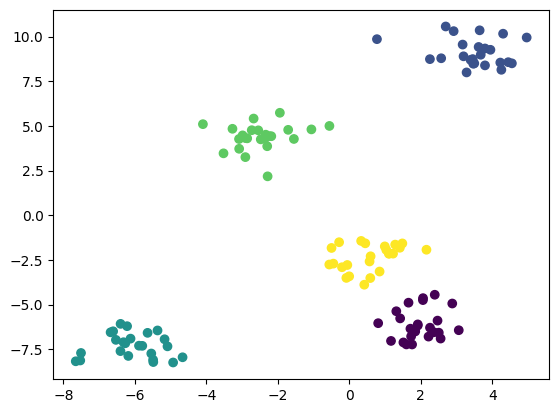

In [257]:
#Predict for the same nb. of clusters = 5

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

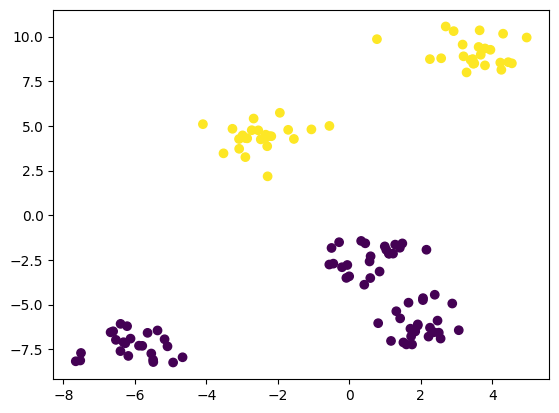

In [258]:
#Predict for 2 instead of 5 clusters

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

In [259]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 2026.6569894340298


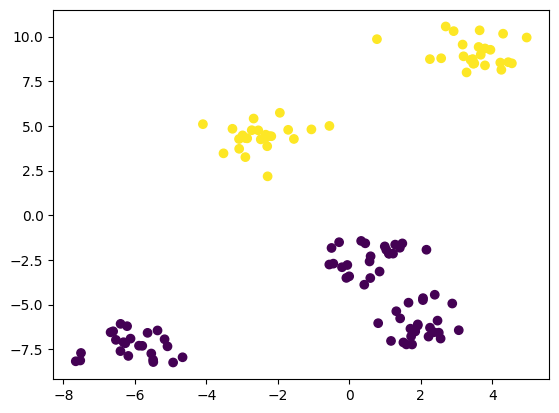

In [260]:
#K-means++ - solve the problem of random initialization (default)
#Random - choose n_clusters observations (rows) at random from data for the initial centroids

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto", init='random').fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

In [261]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 2026.6569894340298


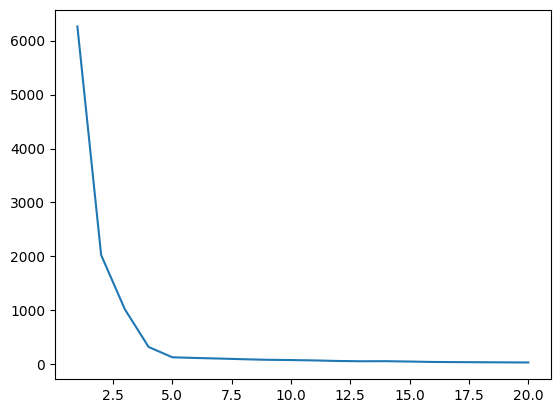

In [262]:
#ELBOW METHOD

distortions = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto", init='random').fit(X)
    distortions.append(kmeans.inertia_)

k = np.arange(1, 21, 1)
plt.plot(k, distortions)
plt.show()

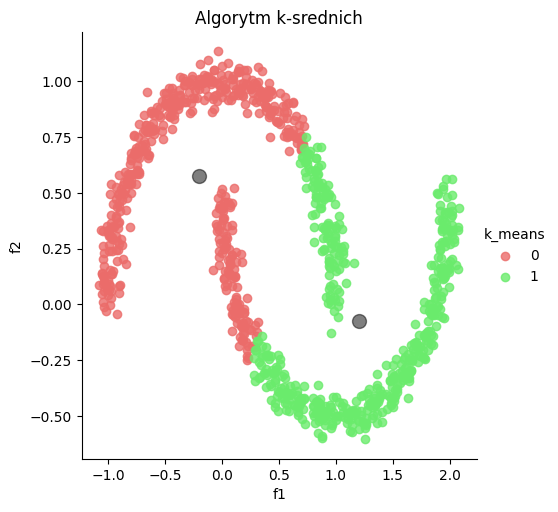

In [263]:
#Please check whether the K-Means algorithm will correctly cluster the data:

from sklearn.datasets import make_moons
import seaborn as sns
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

#TODO: Kmeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x)
y_km = kmeans.predict(x)
centers = kmeans.cluster_centers_

#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

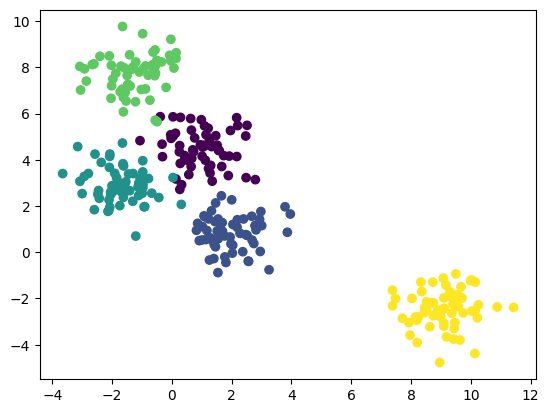

In [264]:
#Clustering II - hierarchical methods
#Dendrograms

#Create the dataset using make blobs function
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.show()

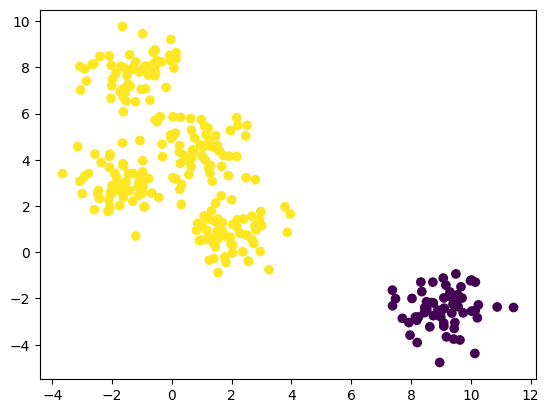

In [265]:
#Use the Means function with k=2 to assign points to clusters

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto", init='random').fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

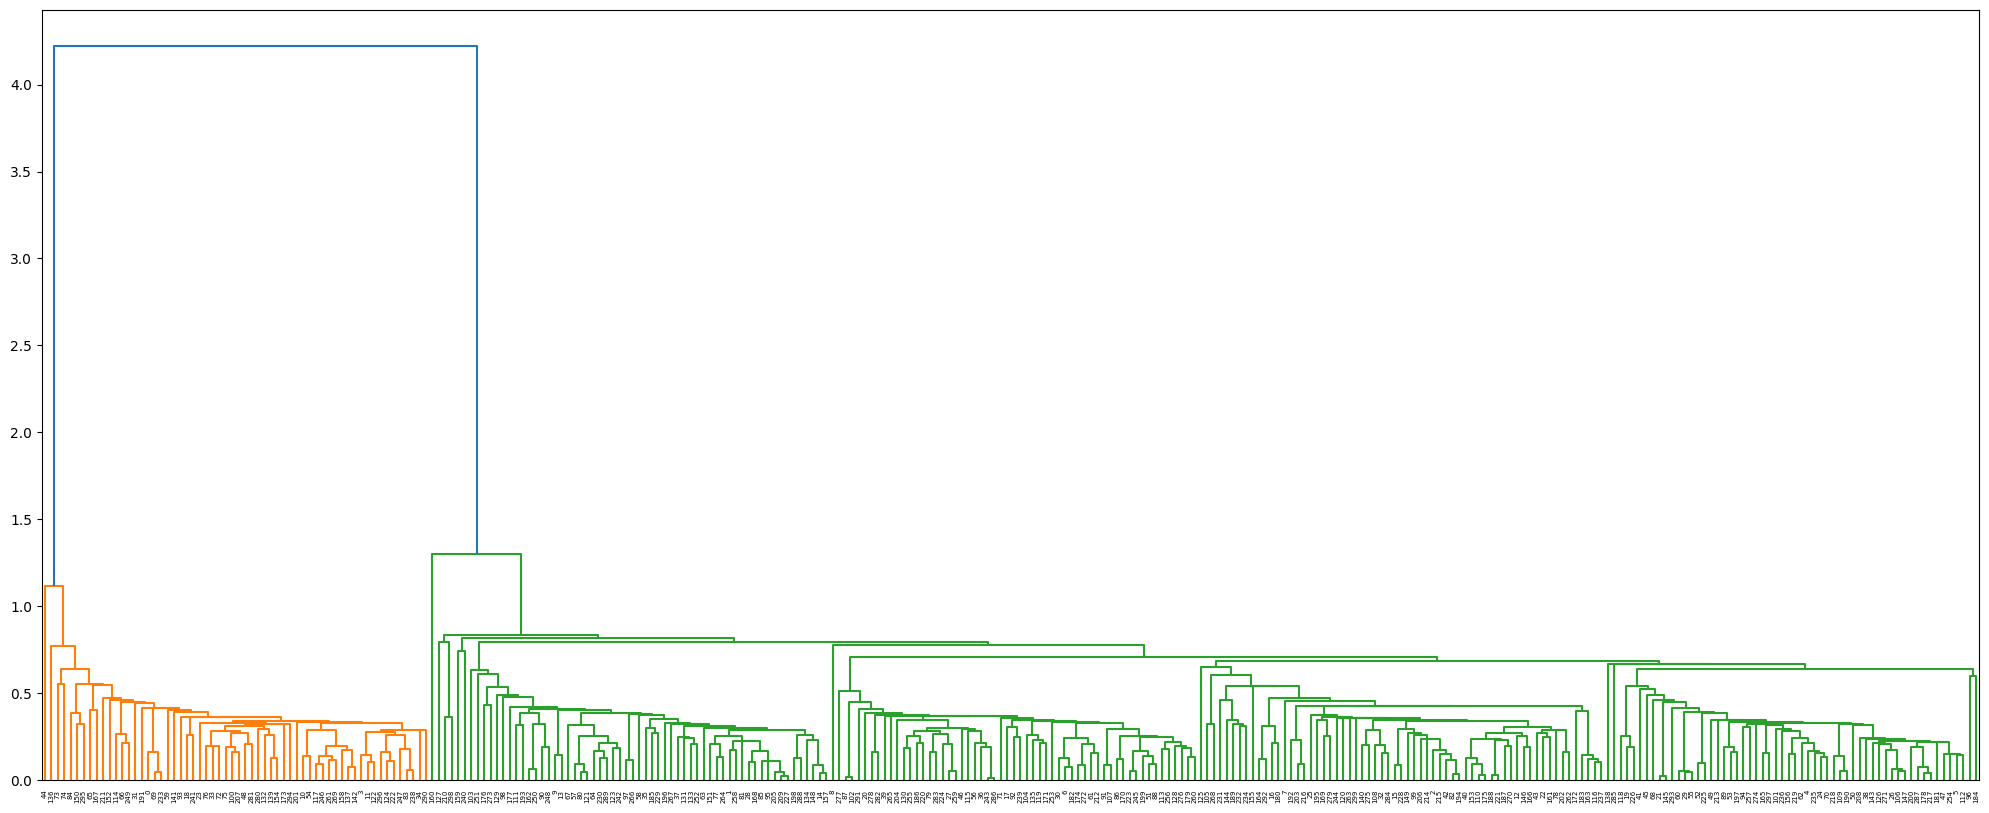

In [266]:
#Use the scipy libraries to draw the dendrogram for the data

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

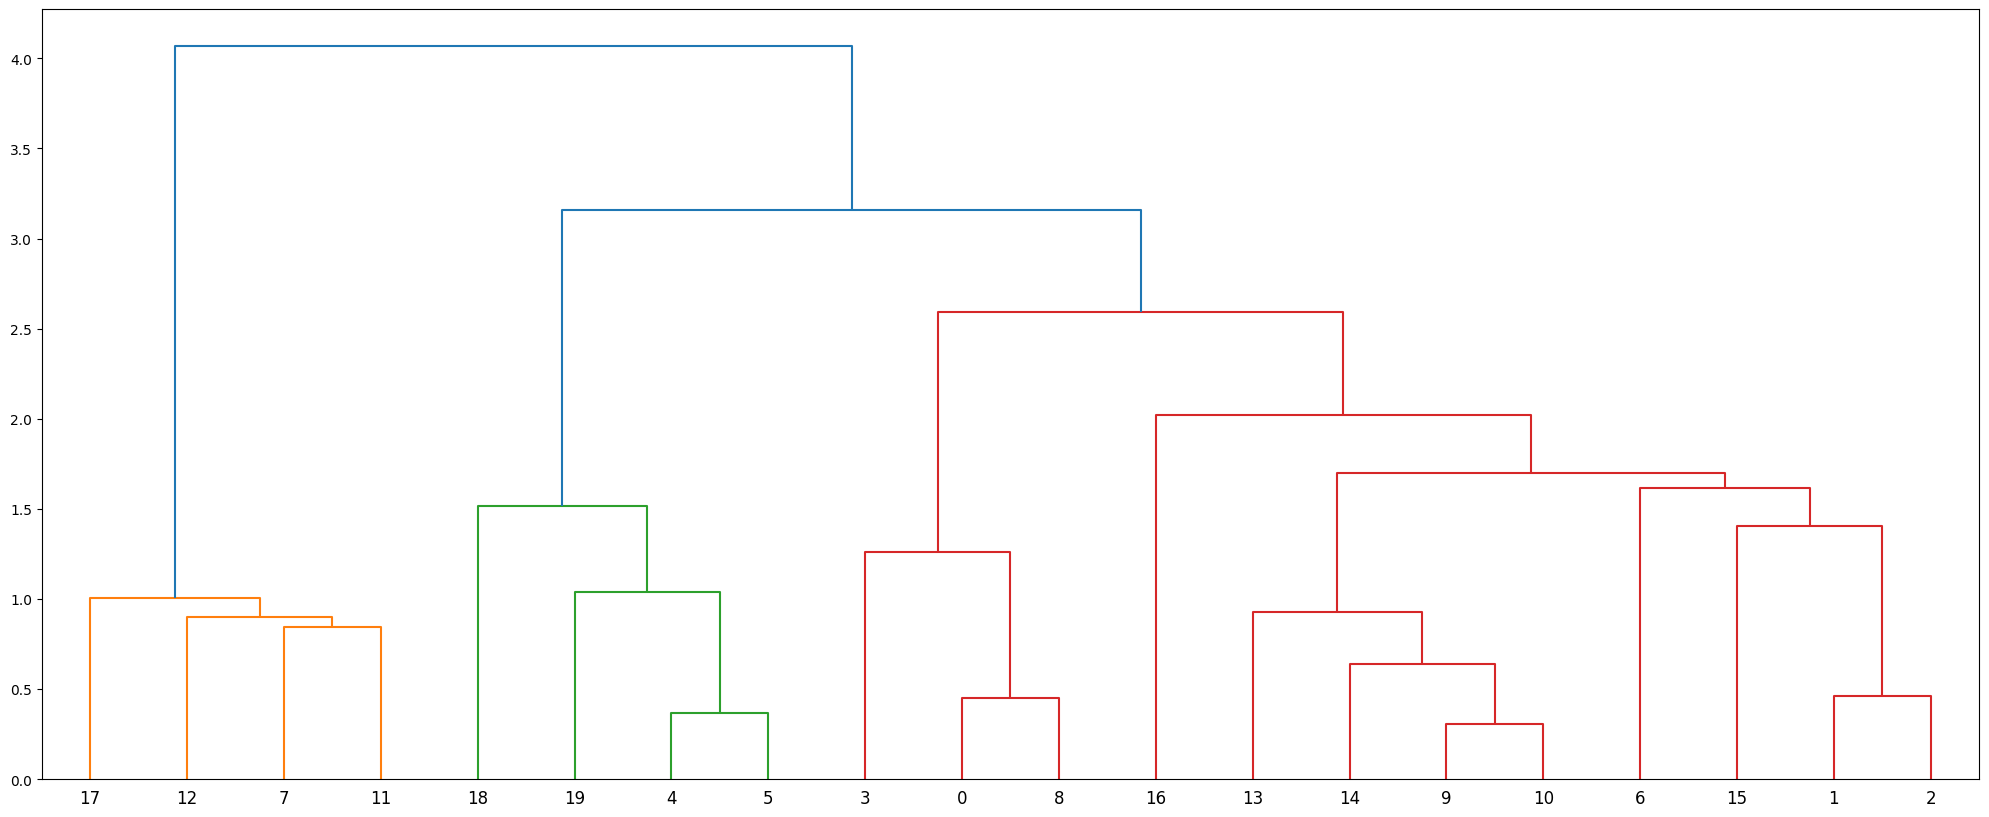

In [267]:
#Something this makes clear is that visualizing the dengrogram is useful, but it's not for big dataset. Create a smaller dataset to draw a dendogram.

X, y_true = make_blobs(n_samples=20, centers=5, cluster_std=0.8, random_state=0)

Z = linkage(X)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [268]:
#Agglomerative clustering

#Please read the dataset and choose columns to further analysis. The dataset contains 200 records and 5 attributes.
#Use only Annual Income and Spending Score columns for clustering

data = pd.read_csv('shopping_data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [269]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
print(X.head())
X = np.array(X)

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


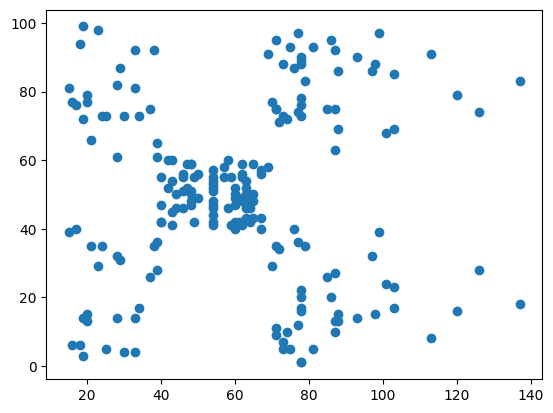

In [270]:
plt.scatter(X[:,0], X[:,1])
plt.show()

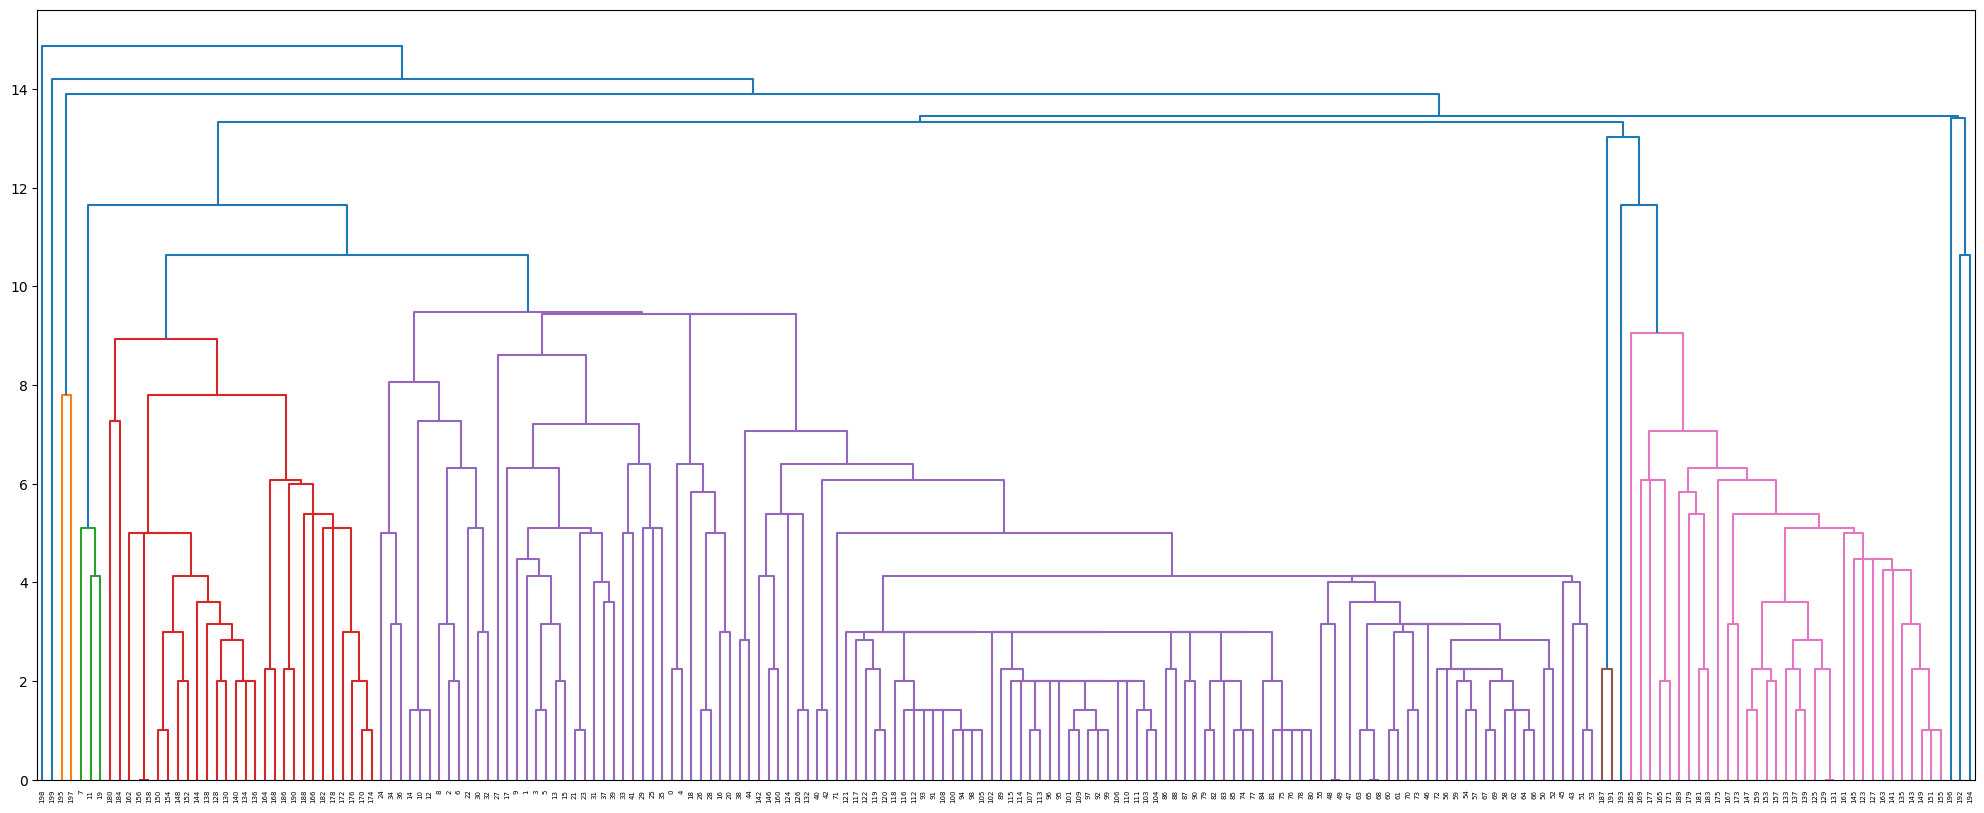

In [271]:
#Create a dendrogram to chose the appropriate k value

Z = linkage(X)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

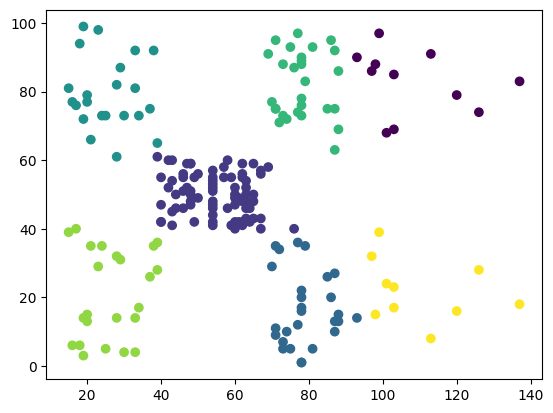

In [272]:
kmeans = KMeans(n_clusters=7, random_state=0, n_init="auto", init='random').fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

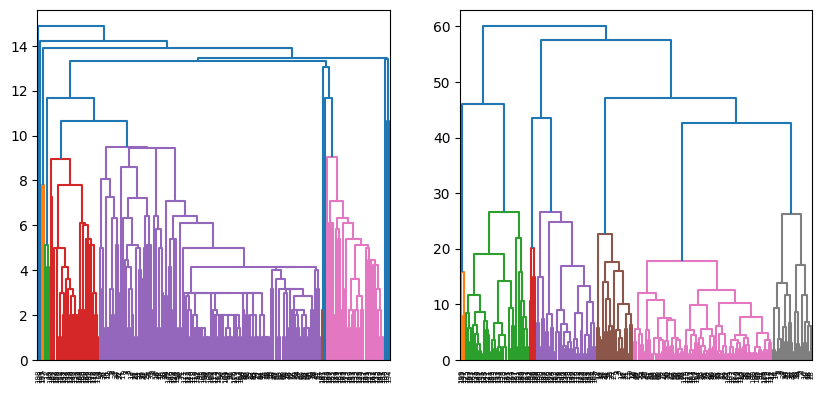

In [273]:
#Analyse results for different linkage values - single, average,complete linkage and Ward.
#The linkage method takes the dataset and the method to minimize distances as parameters.

plt.figure(figsize = (10,10))

Z_sing = linkage(X, method='single')
plt.subplot(2,2,1)
dn_sing = dendrogram(Z_sing)

Z_avg = linkage(X, method='average')
plt.subplot(2,2,2)
dn_avg = dendrogram(Z_avg)

# Z_comp - linkage(X, method='complete')
# plt.subplot(2,2,3)
# dn_comp = dendrogram(Z_comp)

# Z_ward - linkage(X, method='ward')
# plt.subplot(2,2,4)
# dn_ward = dendrogram(Z_ward)

plt.show()

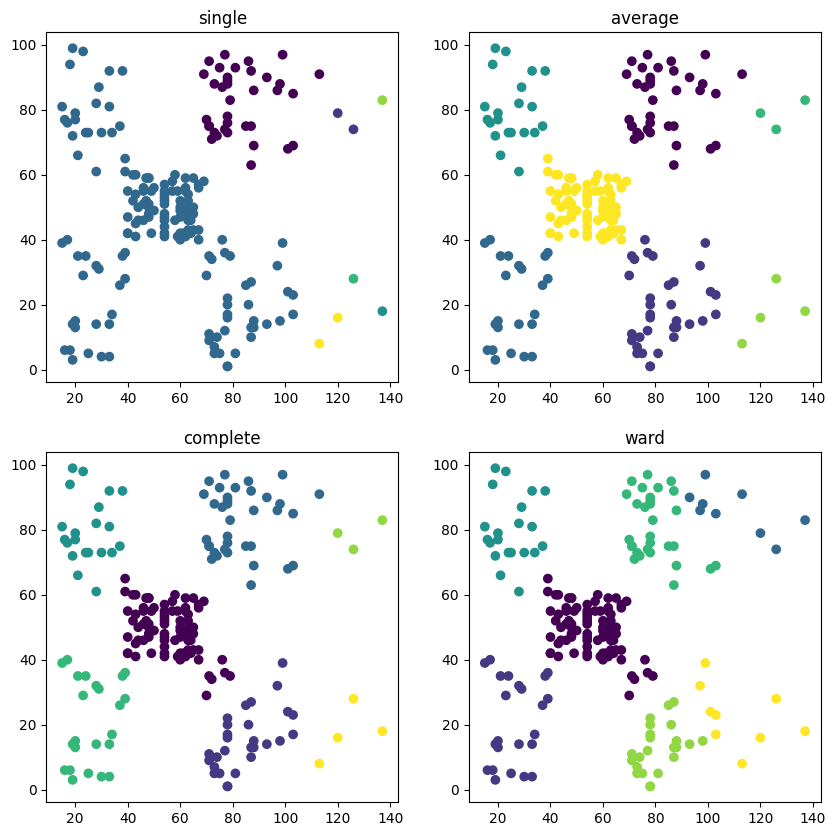

In [274]:
#Use the AgglomerativeClustering class of the sklearn.cluster library to build the model predict clusters

from sklearn.cluster import AgglomerativeClustering

linkages = ["single","average","complete","ward"]

plt.figure(figsize = (10,10))
for i in range(4):
    clustering = AgglomerativeClustering(n_clusters=7, linkage=linkages[i]).fit(X)
    y_pred = clustering.fit(X)
    clustering_labels = clustering.labels_
    plt.subplot(2,2, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=clustering_labels) 
    plt.title(linkages[i]) 
    
plt.show()

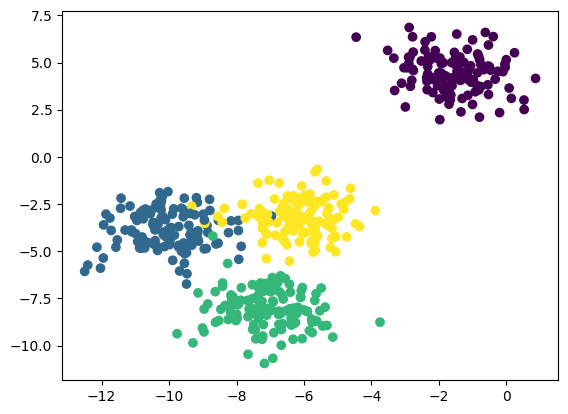

In [275]:
#Selecting the number of clusters with silhouette analysis on KMeans clustering

from sklearn.metrics import silhouette_score, silhouette_samples

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Clusters: 2  Silhouette score: 0.7049787496083262
Clusters: 3  Silhouette score: 0.5882004012129721
Clusters: 4  Silhouette score: 0.6505186632729437
Clusters: 5  Silhouette score: 0.5737098048695828
Clusters: 6  Silhouette score: 0.4853157817681836


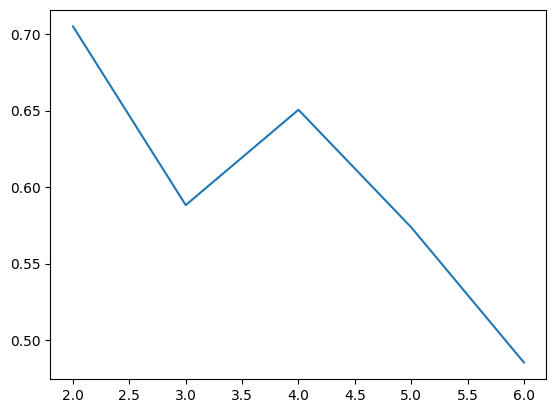

In [276]:
cluster_range = [2,3,4,5,6]
scores = []
for n_cluster in cluster_range:
    #Perform k-Means
    clusterer = KMeans(n_clusters=n_cluster, random_state=0, n_init="auto", init='random').fit(X)
    
    #Calculate and print the silhouette_score
    y_pred = clusterer.fit_predict(X)
    score = silhouette_score(X, y_pred)
    scores.append(score)
    print("Clusters:", n_cluster, " Silhouette score:", score)
    
plt.plot(cluster_range, scores)
plt.show()

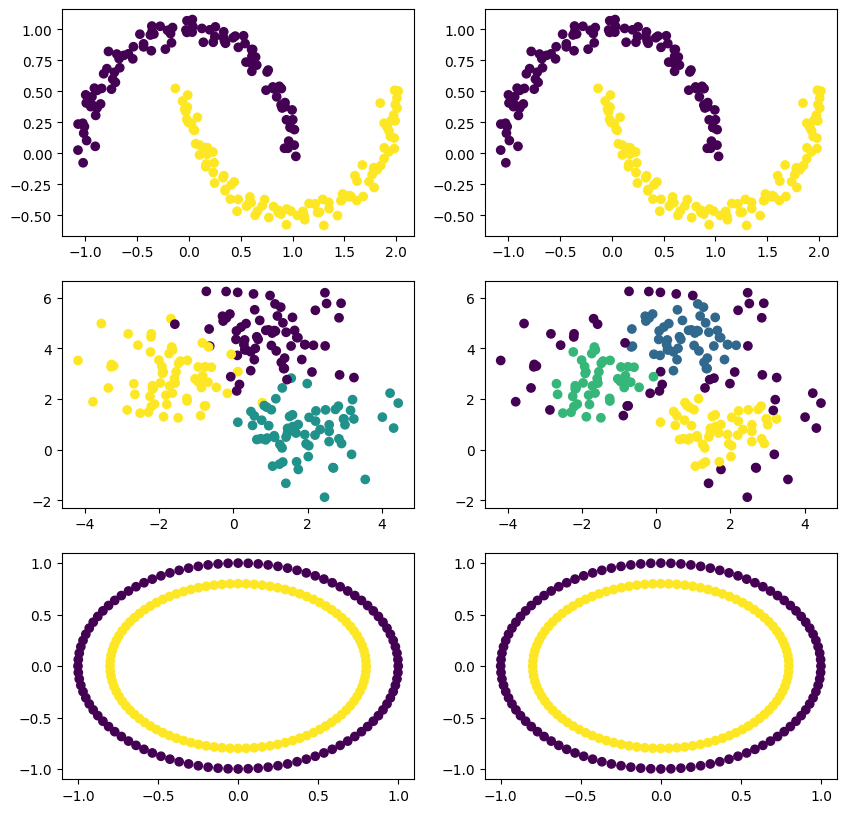

In [277]:
#DBSCAN - density based clusterring (it is pretty slow and requires a cerefull parameter selection)

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import DBSCAN

plt.figure(figsize = (10,10))

X, y = make_moons(n_samples=200, noise=.05, random_state=0)
plt.subplot(3,2,1)
plt.scatter(X[:,0],X[:,1], c=y)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
y_pred = db.fit_predict(X)
plt.subplot(3,2,2)
plt.scatter(X[:,0],X[:,1], c=y_pred)


X, y = make_blobs(n_samples=200, random_state=0)
plt.subplot(3,2,3)
plt.scatter(X[:,0],X[:,1], c=y)

db = DBSCAN(eps=0.8, min_samples=15).fit(X)
y_pred = db.fit_predict(X)
plt.subplot(3,2,4)
plt.scatter(X[:,0],X[:,1], c=y_pred)


X, y = make_circles(n_samples=200, random_state=0)
plt.subplot(3,2,5)
plt.scatter(X[:,0],X[:,1], c=y)

db = DBSCAN(eps=0.1, min_samples=2).fit(X)
y_pred = db.fit_predict(X)
plt.subplot(3,2,6)
plt.scatter(X[:,0],X[:,1], c=y_pred)

plt.show()